In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")

import plotly.express as px
import plotly.graph_objects as go

import geopandas as gpd
import libpysal as ps

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import warnings
warnings.filterwarnings('ignore') 
import time
import os

C:\Users\omkarp\AppData\Local\anaconda3\envs\radhika\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\omkarp\AppData\Local\Temp\ipykernel_17912\256623606.py:20: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https

In [2]:
os.chdir("C:\\Users\\omkarp\\Downloads\\")
data = pd.read_csv('DATA_Sto5.csv')
data = data.dropna()
data = data.reset_index(drop=True)
data

,FID_grid,x,y,week,season,count_trips,TEn_ur,THin_ur,TOth_ur,Resi_lur,Comm_lur,Edu_lur,Recre_lur,Public_lur,Health_lur,Other_lur,entropy,AreaProx,Pop_den,PopM_den,PopF_den,Empl_den,MEmpl_den,FEmpl_den,Inc_den,Veh_den,Vused_den,Vunus_den,Rd_Pri,Rd_Sec,Rd_Ter,Rd_Cyc,Rd_Pedes,Rd_Other,LUP_Resi,LUP_Comm,LUP_Edu,LUP_Recre,LUP_Public,LUP_Health,LUP_Other,T_Enable,T_Hinder,T_Other
0,10,671201.8641,6.575992e+06,weekday,Winter,7,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,6.601050e+05,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.000000,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0
1,10,671201.8641,6.575992e+06,weekend,Winter,14,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,6.601050e+05,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.000000,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0
2,17,674001.8641,6.575992e+06,weekday,Winter,8,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,4.063138e+05,987.50,506.25,481.25,868.75,431.25,437.5,468.75,518.75,450.0,68.75,0.000000,6948.142263,8278.486786,8255.257711,831.752337,3616.468611,0,6,0,0,0,0,0,0,0,0
3,18,674401.8641,6.575992e+06,weekday,Winter,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,1.108947e+05,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.000000,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0
4,18,674401.8641,6.575992e+06,weekend,Winter,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,1.108947e+05,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.000000,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,896,672001.8641,6.586392e+06,weekend,Summer,12,0.0,1.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,1.038490e+06,8550.00,4900.00,3650.00,8331.25,4843.75,3487.5,1218.75,1093.75,975.0,112.50,5077.379389,3774.779118,11592.020272,6924.410696,19612.225930,2559.496105,0,0,0,0,0,0,0,0,12,0
2711,897,672401.8641,6.586392e+06,weekday,Fall,7,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,9.344160e+05,3181.25,1575.00,1606.25,2993.75,1487.50,1512.5,1193.75,1368.75,1212.5,156.25,5019.759449,1420.235755,10031.470276,11003.473923,12239.956029,756.464465,0,50,0,0,0,0,0,0,0,0
2712,897,672401.8641,6.586392e+06,weekend,Fall,9,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,9.344160e+05,3181.25,1575.00,1606.25,2993.75,1487.50,1512.5,1193.75,1368.75,1212.5,156.25,5019.759449,1420.235755,10031.470276,11003.473923,12239.956029,756.464465,0,50,0,0,0,0,0,0,0,0
2713,897,672401.8641,6.586392e+06,weekday,Summer,22,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,9.344160e+05,3181.25,1575.00,1606.25,2993.75,1487.50,1512.5,1193.75,1368.75,1212.5,156.25,5019.759449,1420.235755,10031.470276,11003.473923,12239.956029,756.464465,0,50,0,0,0,0,0,0,0,0


In [3]:
day_encoder = OneHotEncoder(drop='first', sparse=False) 
day_encoded = day_encoder.fit_transform(data[['week']])
day_columns = day_encoder.get_feature_names_out(['week'])
day_df = pd.DataFrame(day_encoded, columns=day_columns)
data = pd.concat([data, day_df], axis=1)

month_encoder = OneHotEncoder(drop='first', sparse=False)
month_encoded = month_encoder.fit_transform(data[['season']])
month_columns = month_encoder.get_feature_names_out(['season'])
month_df = pd.DataFrame(month_encoded, columns=month_columns)
data = pd.concat([data, month_df], axis=1)
data = data.drop(['week', 'season'], axis=1)
data.head()

,FID_grid,x,y,count_trips,TEn_ur,THin_ur,TOth_ur,Resi_lur,Comm_lur,Edu_lur,Recre_lur,Public_lur,Health_lur,Other_lur,entropy,AreaProx,Pop_den,PopM_den,PopF_den,Empl_den,MEmpl_den,FEmpl_den,Inc_den,Veh_den,Vused_den,Vunus_den,Rd_Pri,Rd_Sec,Rd_Ter,Rd_Cyc,Rd_Pedes,Rd_Other,LUP_Resi,LUP_Comm,LUP_Edu,LUP_Recre,LUP_Public,LUP_Health,LUP_Other,T_Enable,T_Hinder,T_Other,week_weekend,season_Spring,season_Summer,season_Winter
0,10,671201.8641,6.575992e+06,7,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.0,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
1,10,671201.8641,6.575992e+06,14,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.0,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0
2,17,674001.8641,6.575992e+06,8,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,406313.760336,987.50,506.25,481.25,868.75,431.25,437.5,468.75,518.75,450.0,68.75,0.0,6948.142263,8278.486786,8255.257711,831.752337,3616.468611,0,6,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
3,18,674401.8641,6.575992e+06,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,110894.679720,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.0,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0,0.0,0.0,0.0,1.0
4,18,674401.8641,6.575992e+06,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,110894.679720,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.0,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0,1.0,0.0,0.0,1.0


In [4]:
os.chdir('C:\\Users\\omkarp\\Downloads\\Python\\Stockholm\\')
grid = gpd.read_file('Grid.shp')
grid = grid.rename(columns={'ID_grid': 'FID_grid'})

merged = data.merge(grid[['FID_grid', 'geometry']], on='FID_grid', how='left')
gdf = gpd.GeoDataFrame(merged, geometry='geometry')
gdf['x'] = gdf['geometry'].centroid.x
gdf['y'] = gdf['geometry'].centroid.y
gdf.head(2)

,FID_grid,x,y,count_trips,TEn_ur,THin_ur,TOth_ur,Resi_lur,Comm_lur,Edu_lur,Recre_lur,Public_lur,Health_lur,Other_lur,entropy,AreaProx,Pop_den,PopM_den,PopF_den,Empl_den,MEmpl_den,FEmpl_den,Inc_den,Veh_den,Vused_den,Vunus_den,Rd_Pri,Rd_Sec,Rd_Ter,Rd_Cyc,Rd_Pedes,Rd_Other,LUP_Resi,LUP_Comm,LUP_Edu,LUP_Recre,LUP_Public,LUP_Health,LUP_Other,T_Enable,T_Hinder,T_Other,week_weekend,season_Spring,season_Summer,season_Winter,geometry
0,10,671201.8641,6.575992e+06,7,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.0,2818.75,5056.25,2525.0,2525.0,1106.25,2237.5,1925.0,312.5,0.0,0.0,13541.763669,9061.56598,6032.734775,628.05477,0,25,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,"POLYGON ((671001.864 6575792.310, 671001.864 6..."
1,10,671201.8641,6.575992e+06,14,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.0,2818.75,5056.25,2525.0,2525.0,1106.25,2237.5,1925.0,312.5,0.0,0.0,13541.763669,9061.56598,6032.734775,628.05477,0,25,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,"POLYGON ((671001.864 6575792.310, 671001.864 6..."


In [5]:
gdf.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
gdf = gdf.dropna(subset=['geometry'])
gdf = gdf.reset_index(drop=True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FID_grid       2715 non-null   int64   
 1   x              2715 non-null   float64 
 2   y              2715 non-null   float64 
 3   count_trips    2715 non-null   int64   
 4   TEn_ur         2715 non-null   float64 
 5   THin_ur        2715 non-null   float64 
 6   TOth_ur        2715 non-null   float64 
 7   Resi_lur       2715 non-null   float64 
 8   Comm_lur       2715 non-null   float64 
 9   Edu_lur        2715 non-null   float64 
 10  Recre_lur      2715 non-null   float64 
 11  Public_lur     2715 non-null   float64 
 12  Health_lur     2715 non-null   float64 
 13  Other_lur      2715 non-null   float64 
 14  entropy        2715 non-null   float64 
 15  AreaProx       2715 non-null   float64 
 16  Pop_den        2715 non-null   float64 
 17  PopM_den       2715 non-n

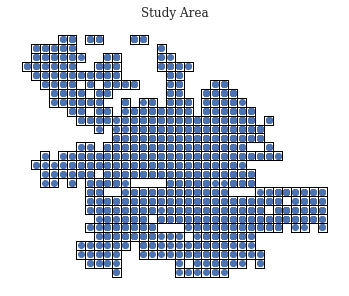

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(color = 'white', edgecolor = 'black', ax = ax)
gdf.centroid.plot(ax=ax)
ax.set_title('Study Area', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

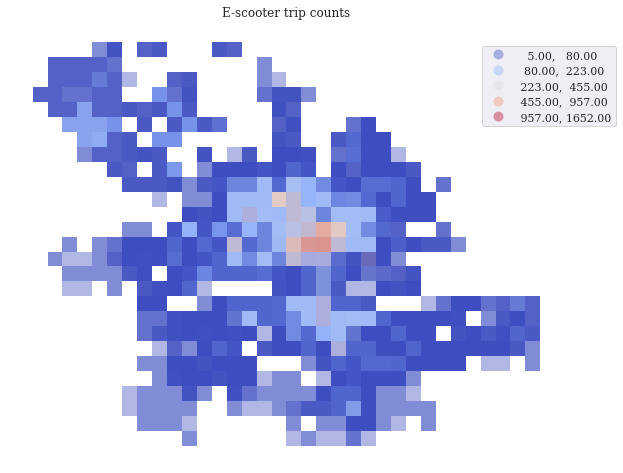

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='count_trips', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=ax, alpha=0.4)  # Set transparency with alpha=0.5
ax.set_title('E-scooter trip counts', fontsize=12)
ax.axis("off")
plt.savefig('myMap.png', dpi=150, bbox_inches='tight')
plt.show()

In [9]:
y = gdf['count_trips'].values.reshape((-1,1))
X = gdf[['Inc_den', 'AreaProx', 'Rd_Pedes', 'TEn_ur', 'Rd_Cyc','THin_ur', 'LUP_Health', 'Rd_Ter',
         'Rd_Sec', 'season_Summer','week_weekend', 'season_Spring']].values

# 'season_Winter','Comm_lur','LUP_Recre','Edu_lur', 'LUP_Edu', 'LUP_Resi', 'T_Other','Rd_Other','LUP_Public','Rd_Pri',
# 'Edu_lur', 'Resi_lur',  'Recre_lur','LUP_Comm'

print(X.shape, y.shape)

(2715, 12) (2715, 1)


In [10]:
u = gdf['x']
v = gdf['y']
coords = list(zip(u,v))

# GWR model

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()  # necessary for lowering multicolliniarity
X_scaled = scaler.fit_transform(X)

gwr_selector = Sel_BW(coords, y, X_scaled)
gwr_bw = gwr_selector.search()
print('GWR bandwidth =', gwr_bw)

GWR bandwidth = 101.0


In [12]:
gwr_results = GWR(coords, y, X_scaled, gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                2715
Number of covariates:                                                    13

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       23530936.135
Log-likelihood:                                                  -16161.250
AIC:                                                              32348.500
AICc:                                                             32350.655
BIC:                                                           23509572.645
R2:                                                                   0.445
Adj. R2:                                                              0.443

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [13]:
print('Mean R2 =', gwr_results.R2)
print('AIC =', gwr_results.aic)
print('AICc =', gwr_results.aicc)

Mean R2 = 0.9415173354362479
AIC = 27399.20247256882
AICc = 27730.106558069874


In [14]:
gdf['gwr_R2'] = gwr_results.localR2

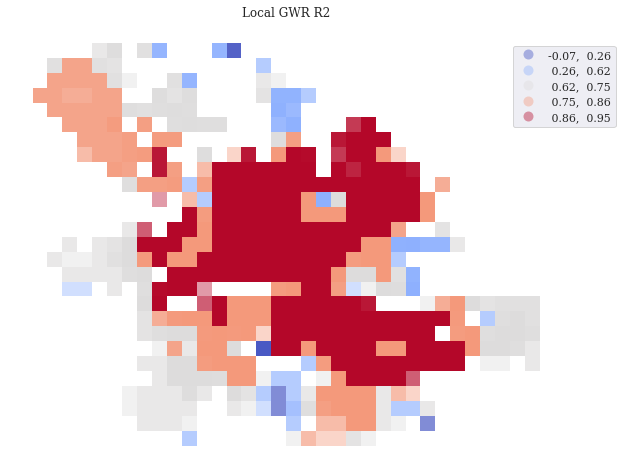

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gwr_R2', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax, alpha=0.4)
ax.set_title('Local GWR R2', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [16]:
features = ['Inc_den', 'AreaProx', 'Rd_Pedes', 'TEn_ur', 'Rd_Cyc','THin_ur', 'LUP_Health', 'Rd_Ter','Rd_Sec', 
            'season_Summer','week_weekend', 'season_Spring']

for i, feature in enumerate(features):
    gdf[f'gwr_{feature}'] = gwr_results.params[:, i]
    
gdf.head()

,FID_grid,x,y,count_trips,TEn_ur,THin_ur,TOth_ur,Resi_lur,Comm_lur,Edu_lur,Recre_lur,Public_lur,Health_lur,Other_lur,entropy,AreaProx,Pop_den,PopM_den,PopF_den,Empl_den,MEmpl_den,FEmpl_den,Inc_den,Veh_den,Vused_den,Vunus_den,Rd_Pri,Rd_Sec,Rd_Ter,Rd_Cyc,Rd_Pedes,Rd_Other,LUP_Resi,LUP_Comm,LUP_Edu,LUP_Recre,LUP_Public,LUP_Health,LUP_Other,T_Enable,T_Hinder,T_Other,week_weekend,season_Spring,season_Summer,season_Winter,geometry,gwr_R2,gwr_Inc_den,gwr_AreaProx,gwr_Rd_Pedes,gwr_TEn_ur,gwr_Rd_Cyc,gwr_THin_ur,gwr_LUP_Health,gwr_Rd_Ter,gwr_Rd_Sec,gwr_season_Summer,gwr_week_weekend,gwr_season_Spring
0,10,671201.8641,6.575992e+06,7,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.0,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,"POLYGON ((671001.864 6575792.310, 671001.864 6...",0.609871,6.523514,-2.508090,-0.017577,2.261221,-1.014625,0.725805,0.728886,-53.769216,6.804348,-0.636118,5.039116,1.659486
1,10,671201.8641,6.575992e+06,14,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,660104.976827,5543.75,2725.00,2818.75,5056.25,2525.00,2525.0,1106.25,2237.50,1925.0,312.50,0.0,0.000000,13541.763669,9061.565980,6032.734775,628.054770,0,25,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,"POLYGON ((671001.864 6575792.310, 671001.864 6...",0.609871,6.523514,-2.508090,-0.017577,2.261221,-1.014625,0.725805,0.728886,-53.769216,6.804348,-0.636118,5.039116,1.659486
2,17,674001.8641,6.575992e+06,8,0.0,0.0,0.0,0.00001,1.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000423,406313.760336,987.50,506.25,481.25,868.75,431.25,437.5,468.75,518.75,450.0,68.75,0.0,6948.142263,8278.486786,8255.257711,831.752337,3616.468611,0,6,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,"POLYGON ((673801.864 6575792.310, 673801.864 6...",0.691460,-0.691731,-49.552162,0.808043,18.221933,0.603646,2.763559,-1.713414,-1.296850,-5.254670,5.035780,5.357916,0.673566
3,18,674401.8641,6.575992e+06,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,110894.679720,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.0,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0,0.0,0.0,0.0,1.0,"POLYGON ((674201.864 6575792.310, 674201.864 6...",0.761276,-13.017316,-71.144199,-3.587108,23.608479,-0.052834,4.832721,-2.091431,-3.078521,-2.015621,9.488521,9.240504,1.420007
4,18,674401.8641,6.575992e+06,5,0.0,0.0,0.0,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,1.00001,0.000423,110894.679720,1206.25,612.50,587.50,1075.00,537.50,537.5,562.50,606.25,537.5,68.75,0.0,585.213751,18664.848876,9894.429061,2177.338741,0.000000,0,0,0,0,0,0,62,0,0,0,1.0,0.0,0.0,1.0,"POLYGON ((674201.864 6575792.310, 674201.864 6...",0.761276,-13.017316,-71.144199,-3.587108,23.608479,-0.052834,4.832721,-2.091431,-3.078521,-2.015621,9.488521,9.240504,1.420007


# Filter/correct t-stats

In [17]:
# Filter t-values: standard alpha = 0.05
gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.05)
# Filter t-values: corrected alpha due to multiple testing
gwr_filtered_tc = gwr_results.filter_tvals()

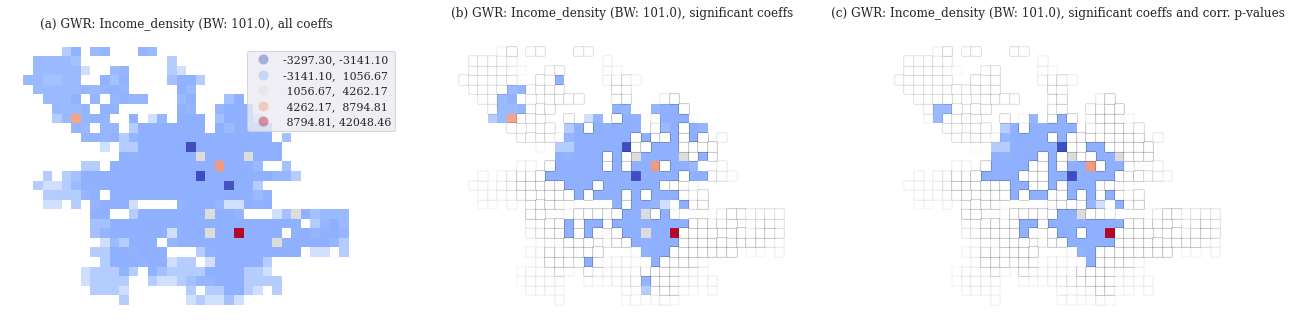

In [18]:
# Map Income
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

gdf.plot(column='gwr_Inc_den', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor':(1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_Inc_den', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor':(1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_Inc_den', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor':(1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Income_density (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Income_density (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Income_density (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

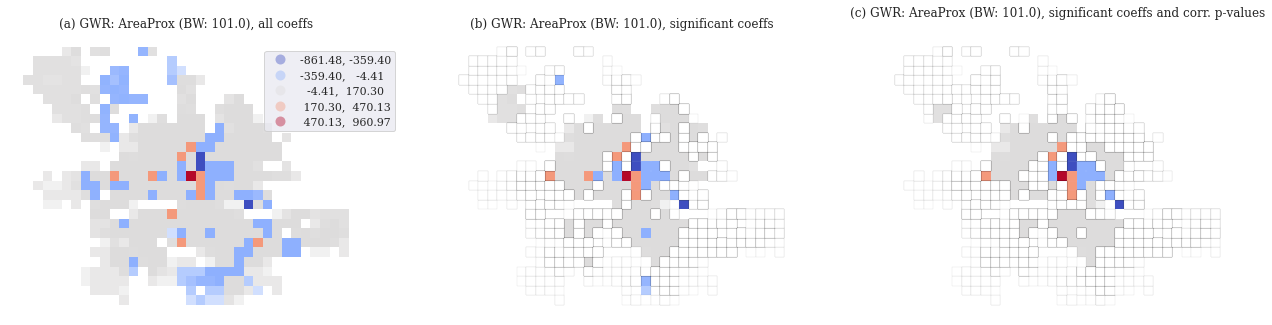

In [19]:
# Map coefficients for 'AreaProx'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_AreaProx', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_AreaProx', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_AreaProx', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: AreaProx (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: AreaProx (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: AreaProx (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

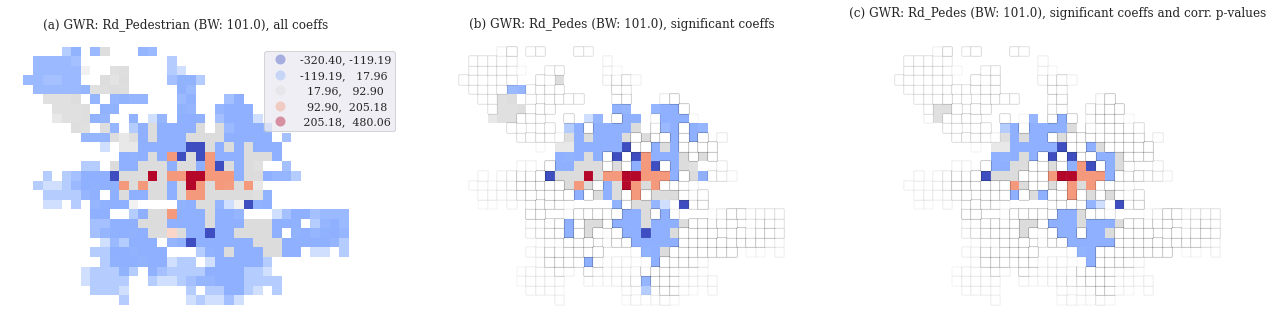

In [20]:
# Map coefficients for 'Rd_Pedes'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_Rd_Pedes', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_Rd_Pedes', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_Rd_Pedes', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Rd_Pedestrian (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Rd_Pedes (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Rd_Pedes (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

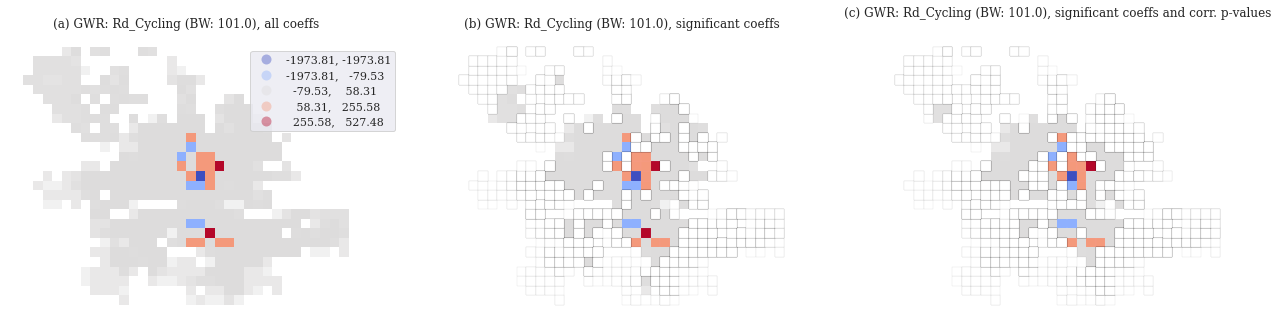

In [21]:
# Map coefficients for 'Rd_Cyc'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_Rd_Cyc', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_Rd_Cyc', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_Rd_Cyc', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Rd_Cycling (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Rd_Cycling (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Rd_Cycling (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

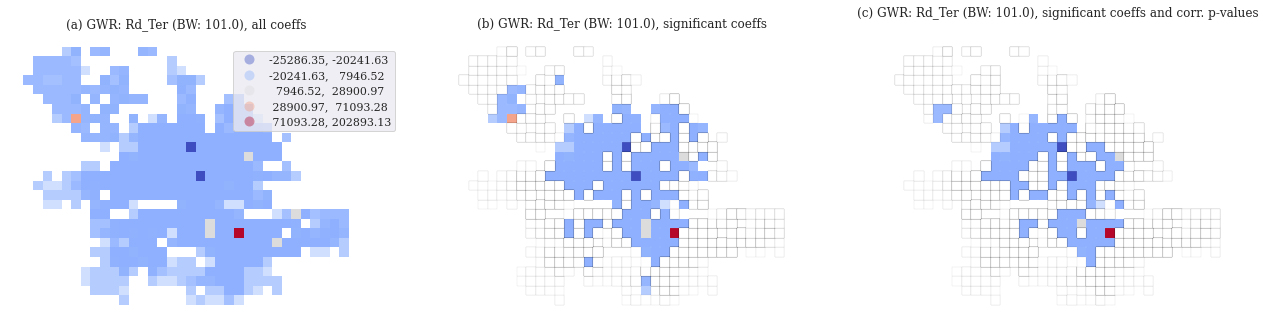

In [22]:
# Map coefficients for 'Rd_Ter'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_Rd_Ter', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_Rd_Ter', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_Rd_Ter', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Rd_Ter (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Rd_Ter (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Rd_Ter (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

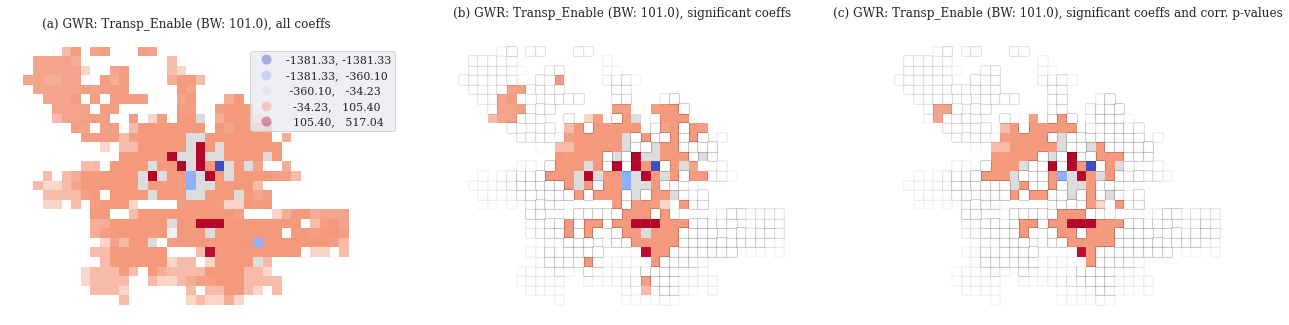

In [23]:
# Map coefficients for 'TEn_ur'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_TEn_ur', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_TEn_ur', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_TEn_ur', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Transp_Enable (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Transp_Enable (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Transp_Enable (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

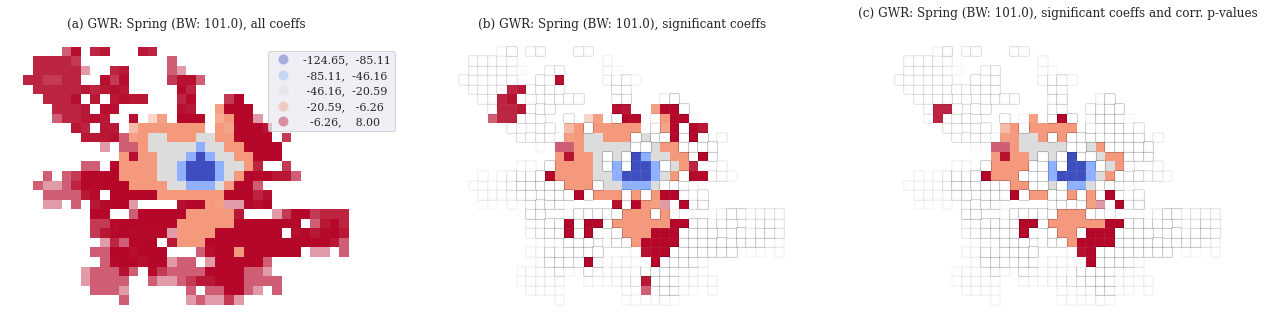

In [25]:
# Map coefficients for 'season_Spring'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_season_Spring', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_season_Spring', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_season_Spring', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Spring (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Spring (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Spring (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

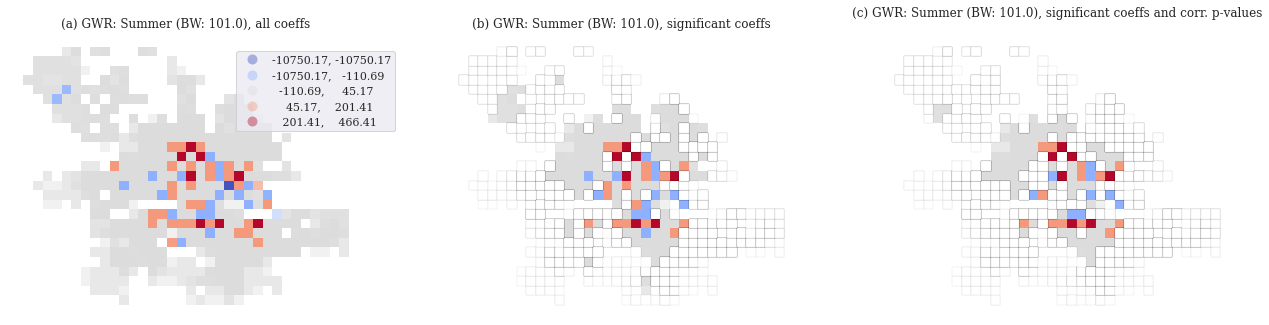

In [26]:
# Map coefficients for 'season_Summer'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_season_Summer', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_season_Summer', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_season_Summer', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Summer (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Summer (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Summer (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()

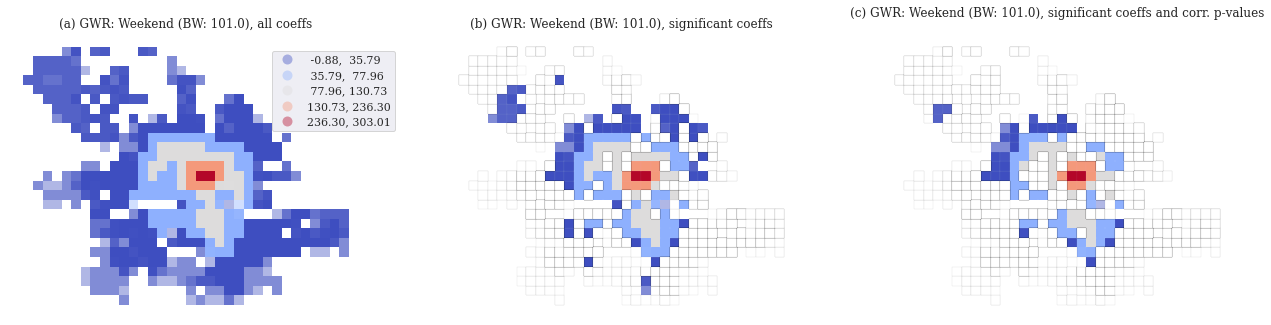

In [27]:
# Map coefficients for 'week_weekend'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

gdf.plot(column='gwr_week_weekend', cmap='coolwarm', linewidth=0.01, scheme='FisherJenks', k=5, legend=True, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[0], alpha=0.4)

gdf.plot(column='gwr_week_weekend', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[1], alpha=0.4)
gdf[gwr_filtered_t[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])

gdf.plot(column='gwr_week_weekend', cmap='coolwarm', linewidth=0.05, scheme='FisherJenks', k=5, legend=False, 
         legend_kwds={'bbox_to_anchor': (1.10, 0.96)}, ax=axes[2], alpha=0.4)
gdf[gwr_filtered_tc[:, 1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(a) GWR: Weekend (BW: ' + str(gwr_bw) + '), all coeffs', fontsize=12)
axes[1].set_title('(b) GWR: Weekend (BW: ' + str(gwr_bw) + '), significant coeffs', fontsize=12)
axes[2].set_title('(c) GWR: Weekend (BW: ' + str(gwr_bw) + '), significant coeffs and corr. p-values', fontsize=12)
plt.show()